# Homework

In this homework, we'll deploy the hairstyle model we trained in the
[previous homework](../08-deep-learning/homework.md).

Download the model from here:

https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/model_2024_hairstyle.keras


In [1]:
# !mkdir data
# !wget -q -O ./data/model_2024_hairstyle.keras https://github.com/alexeygrigorev/large-datasets/releases/download/hairstyle/model_2024_hairstyle.keras

In [2]:
!python --version

Python 3.11.10


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.17.1'

In [5]:
print("Number of available GPUs: ", len(tf.config.list_physical_devices("GPU")))

Number of available GPUs:  1


## Question 1

Now convert this model from Keras to TF-Lite format.

In [6]:
model = keras.models.load_model("./data/model_2024_hairstyle.keras")

2024-12-05 20:56:02.396766: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-05 20:56:02.396800: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-05 20:56:02.396807: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-05 20:56:02.396822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-05 20:56:02.396835: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/homework09-metal/lib/python3.11/site-packages/keras/src/trainers/trainer.py:213: UserWarning: Model doesn't support `jit_compile=True`. Proceed

In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("./data/model_2024_hairstyle.tflite", "wb") as f_out:
    f_out.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/r8/zdlnr35s6qz6zx67nmc9bdnm0000gn/T/tmp6107rjxb/assets


INFO:tensorflow:Assets written to: /var/folders/r8/zdlnr35s6qz6zx67nmc9bdnm0000gn/T/tmp6107rjxb/assets


Saved artifact at '/var/folders/r8/zdlnr35s6qz6zx67nmc9bdnm0000gn/T/tmp6107rjxb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  6063806544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6063807312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6063808080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6063808848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6063810000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  6063810576: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1733428563.501564  858680 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1733428563.502288  858680 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-12-05 20:56:03.503027: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/r8/zdlnr35s6qz6zx67nmc9bdnm0000gn/T/tmp6107rjxb
2024-12-05 20:56:03.503364: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-12-05 20:56:03.503369: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/r8/zdlnr35s6qz6zx67nmc9bdnm0000gn/T/tmp6107rjxb
2024-12-05 20:56:03.507120: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-12-05 20:56:03.507716: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-12-05 20:56:03.594162: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at 

What's the size of the **converted** model?

In [8]:
!ls -lh ./data/model_2024_hairstyle.tflite

-rw-r--r--@ 1 tillmeineke  staff    77M Dec  5 20:56 ./data/model_2024_hairstyle.tflite


* ~~27 Mb~~
* ~~43 Mb~~
* **77 Mb**
* ~~127 Mb~~

## Question 2

In [9]:
import tensorflow.lite as tflite

To be able to use this model, we need to know the index of the input and
the index of the output.

In [10]:
interpreter = tflite.Interpreter(model_path="./data/model_2024_hairstyle.tflite")
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

output_index

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


13

What's the output index for this model?

* ~~3~~
* ~~7~~
* **13**
* ~~24~~

## Preparing the image

You'll need some code for downloading and resizing images. You can use
this code:

In [11]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

For that, you'll need to have `pillow` installed:

```bash
pip install pillow
```

Let's download and resize this image:

https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg

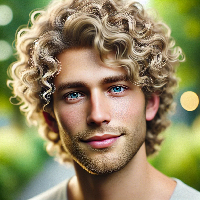

In [12]:
img = download_image(
    "https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg"
)
img = prepare_image(img, target_size=(200, 200))
img


Based on the previous homework, what should be the target size for the image?

200 x 200

## Question 3

Now we need to turn the image into numpy array and pre-process it.

> Tip: Check the previous homework. What was the pre-processing
> we did there?

In [13]:
import numpy as np

In [14]:
def prepare_input(x):
    return x / 255.0

In [15]:
x = np.array(img, dtype="float32")
X = np.array([x])
X = prepare_input(X)

In [16]:
X[0, 0, 0, 0]

0.23921569

After the pre-processing, what's the value in the first pixel, the R channel?

* **0.24**
* ~~0.44~~
* ~~0.64~~
* ~~0.84~~

## Question 4

In [17]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)
preds

array([[0.8934686]], dtype=float32)

Now let's apply this model to this image. What's the output of the model?

* ~~0.293~~
* ~~0.493~~
* ~~0.693~~
* **0.893**

## Prepare the lambda code

Now you need to copy all the code into a separate python file. You will
need to use this file for the next two questions.

Tip: you can test this file locally with `ipython` or Jupyter Notebook
by importing the file and invoking the function from this file.

## Docker

For the next two questions, we'll use a Docker image that we already
prepared. This is the Dockerfile that we used for creating the image:

```docker
FROM public.ecr.aws/lambda/python:3.10

COPY model_2024_hairstyle_v2.tflite .

RUN pip install numpy==1.23.1
```

Note that it uses Python 3.10. The latest models of TF Lite
do not support Python 3.12 yet, so we need to use 3.10. Also,
for this part, we will use TensorFlow 2.14.0. We have tested
it, and the models created with 2.17 could be served with 2.14.0.

For that image, we also needed to use an older version of numpy
(1.23.1)

The docker image is published to [`agrigorev/model-2024-hairstyle:v3`](https://hub.docker.com/r/agrigorev/model-2024-hairstyle/tags).

A few notes:

* The image already contains a model and it's not the same model
  as the one we used for questions 1-4.
* The wheel for this combination that you'll need to use in your Docker image is https://github.com/alexeygrigorev/tflite-aws-lambda/raw/main/tflite/tflite_runtime-2.14.0-cp310-cp310-linux_x86_64.whl


## Question 5

Download the base image `agrigorev/model-2024-hairstyle:v3`. You can do it with [`docker pull`](https://docs.docker.com/engine/reference/commandline/pull/).

In [18]:
!docker pull agrigorev/model-2024-hairstyle:v3
!docker images agrigorev/model-2024-hairstyle:v3

v3: Pulling from agrigorev/model-2024-hairstyle
Digest: sha256:6d0aa19127467401fd439c76e662ceba2bd21a5713f174d4f89b354a26939ea6
Status: Image is up to date for agrigorev/model-2024-hairstyle:v3
docker.io/agrigorev/model-2024-hairstyle:v3

What's next:
    View a summary of image vulnerabilities and recommendations → docker scout quickview agrigorev/model-2024-hairstyle:v3
REPOSITORY                       TAG       IMAGE ID       CREATED      SIZE
agrigorev/model-2024-hairstyle   v3        607850a2138e   2 days ago   782MB


So what's the size of this base image?

* ~~182 Mb~~
* ~~382 Mb~~
* ~~582 Mb~~
* **782 Mb**

You can get this information when running `docker images` - it'll be in the "SIZE" column.

## Question 6

Now let's extend this docker image, install all the required libraries
and add the code for lambda.

You don't need to include the model in the image. It's already included.
The name of the file with the model is `model-2024-hairstyle-v2.tflite` and it's
in the current workdir in the image (see the Dockerfile above for the
reference).
The provided model requires the same preprocessing for images regarding target size and rescaling the value range than used in homework 8.

Now run the container locally.

```bash
docker build --platform linux/amd64 -t hairstyle-homework .
docker run -it --rm -p 9000:8080 --platform linux/amd64 hairstyle-homework
```

Score this image: https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg

```bash
python test_till_meineke.py
```

In [19]:
!python test_till_meineke.py

{'prediction': 0.42985352873802185}


What's the output from the model?

* ~~0.229~~
* **0.429**
* ~~0.629~~
* ~~0.829~~

## Publishing it to AWS

Now you can deploy your model to AWS!

* Publish your image to ECR

```bash
docker build --platform linux/amd64 -t hairstyle-hw .
docker images
docker tag 55958c5c2d9f 727646501899.dkr.ecr.eu-central-1.amazonaws.com/hairstyle:latest
docker push 727646501899.dkr.ecr.eu-central-1.amazonaws.com/hairstyle
```

* Create a lambda function in AWS, use the ECR image (follow the instructions from the lecture)
* Give it more RAM and increase the timeout
* Test it

![Prediction succeeded](./lambda_prediction_test.png)

* Expose the lambda function using API Gateway

This is optional and not graded.

## Publishing to Docker hub

Just for the reference, this is how we published our image to Docker hub:

```bash
docker build -t model-2024-hairstyle -f homework.dockerfile .
docker tag model-2024-hairstyle:latest agrigorev/model-2024-hairstyle:v3
docker push agrigorev/model-2024-hairstyle:v3
```

(You don't need to execute this code)

## Homework URL


[Homework](https://github.com/TillMeineke/ML_Zoomcamp2024_hw/tree/main/09-serverless)

## Time spent on lectures (hours) (optional)

## Time spent on homework (hours) (optional)

## FAQ contribution (FAQ document, optional)